In [261]:
import numpy as np
import pandas as pd

In [262]:
df = pd.read_csv('./Dataset/spam.csv', encoding='latin1')

In [263]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3301,ham,Stop calling everyone saying I might have canc...,NaN,NaN,NaN
321,ham,Hey... Why dont we just go watch x men and hav...,NaN,NaN,NaN
4579,ham,Hi ....My engagement has been fixd on &lt;#&g...,NaN,NaN,NaN
275,ham,Thanx...,NaN,NaN,NaN
5268,ham,\ER,ENJOYIN INDIANS AT THE MO..yeP. SaLL gOoD Heh...,NaN,NaN


In [264]:
df.shape

(5572, 5)

## 1. Data Cleaning

In [265]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [266]:
# Drop last three columns
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [267]:
df.sample(5)

,v1,v2
1537,ham,All sounds good. Fingers . Makes it difficult ...
3727,ham,The search 4 happiness is 1 of d main sources ...
4897,ham,Oh for fuck's sake she's in like tallahassee
4340,ham,ÌÏ all write or wat..
2867,ham,"Aight, tomorrow around &lt;#&gt; it is"


In [268]:
# Renaming the columns
df.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)

In [269]:
df.sample(5)

,target,text
4360,ham,"Don't Think About \What u Have Got\"" Think Abo..."
667,ham,This pay is &lt;DECIMAL&gt; lakhs:)
2694,ham,Hey sexy buns! What of that day? No word from ...
1515,ham,I wonder if you'll get this text?
113,spam,GENT! We are trying to contact you. Last weeke...


In [270]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [271]:
df['target'] = encoder.fit_transform(df['target'])

In [272]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [273]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [274]:
# Check for duplicate values
df.duplicated().sum()

403

In [275]:
# remove duplicates

In [276]:
df = df.drop_duplicates(keep='first')

In [277]:
df.duplicated().sum()

0

In [278]:
df.shape

(5169, 2)

## 2. EDA

(exploratory data analysis)

In [279]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

In [280]:
import matplotlib.pyplot as plt

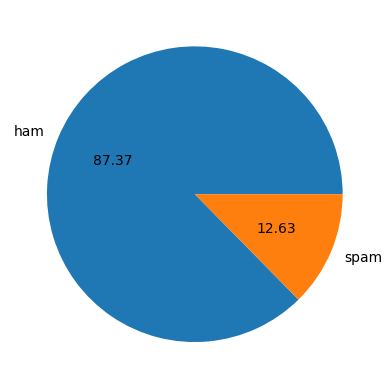

In [281]:
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct='%0.2f')
plt.show()

In [282]:
!pip install nltk

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python3 -m pip install --upgrade pip


In [283]:
import nltk

In [284]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/zeeshan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [285]:
# Number of characters
df['num_characters'] = df['text'].apply(len)

In [286]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [287]:
# Number of Words
df['num_words'] = df['text'].apply(lambda text: len(nltk.word_tokenize(text)))

In [288]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [289]:
# Number of sentences
df['num_sentences'] = df['text'].apply(lambda text: len(nltk.sent_tokenize(text)))

In [290]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [291]:
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [292]:
# for ham
df[df['target'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [293]:
# for spam
df[df['target'] == 1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [294]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

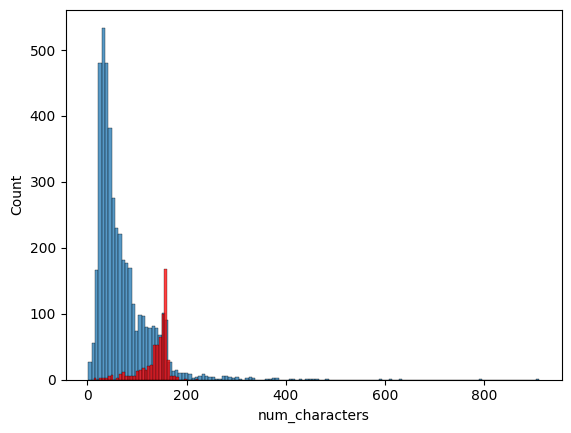

In [295]:
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'], color='red')

<Axes: xlabel='num_words', ylabel='Count'>

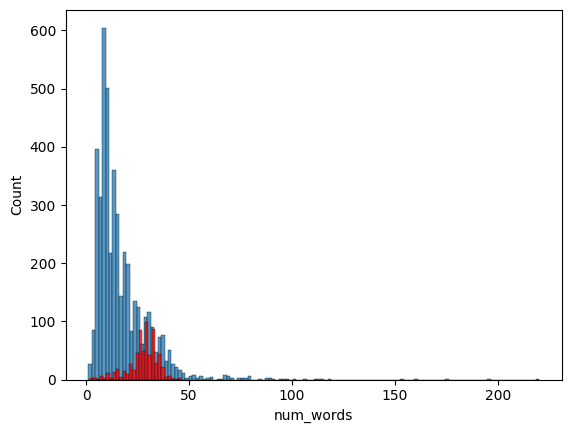

In [296]:
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'], color='red')

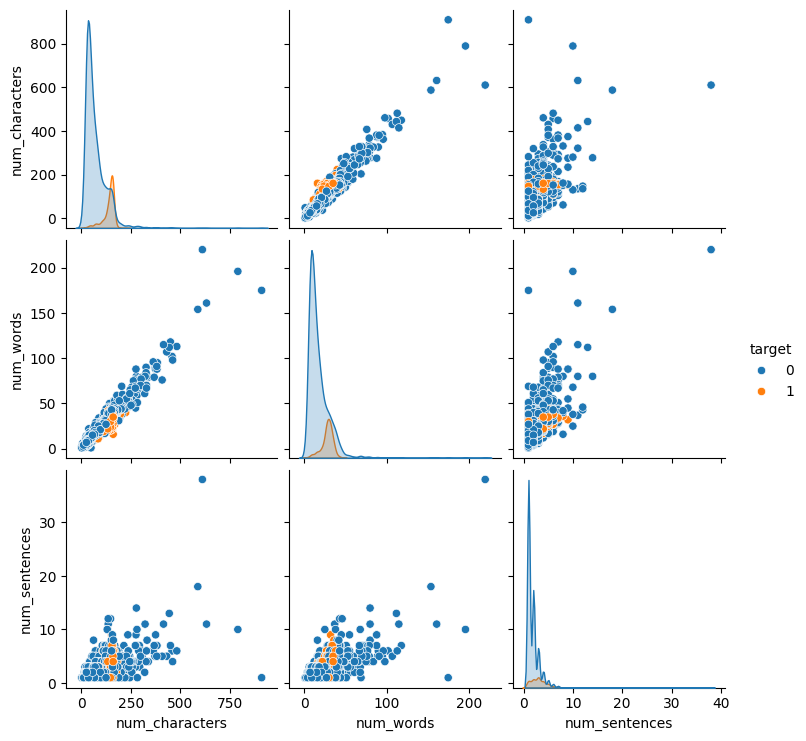

In [297]:
sns.pairplot(df, hue='target')

<Axes: >

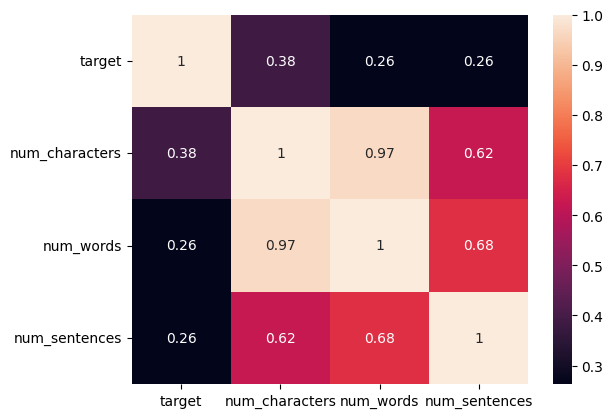

In [298]:
sns.heatmap(df.corr(), annot =True)

## 3. Data Preprocessing
* Lower Case
* Tokenization
* Removing special characters
* Removing stop words and punctuations
* Stemming

In [299]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    # remove non alpha numeric characters/words
    alpha_num = []
    for i in text:
        if i.isalnum():
            alpha_num.append(i)

    # remove stop words like [is, the, you, on...]
    clean_words = []
    for i in alpha_num:
        if i not in stopwords.words('english') and i not in string.punctuation:
            clean_words.append(i)

    result = []
    for i in clean_words:
        result.append(ps.stem(i))

    return " ".join(result)

In [300]:
from nltk.corpus import stopwords
import string

In [301]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/zeeshan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [302]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [303]:
df['transformed_text'] = df['text'].apply(transform_text)

In [304]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [305]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python3 -m pip install --upgrade pip


In [306]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [307]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

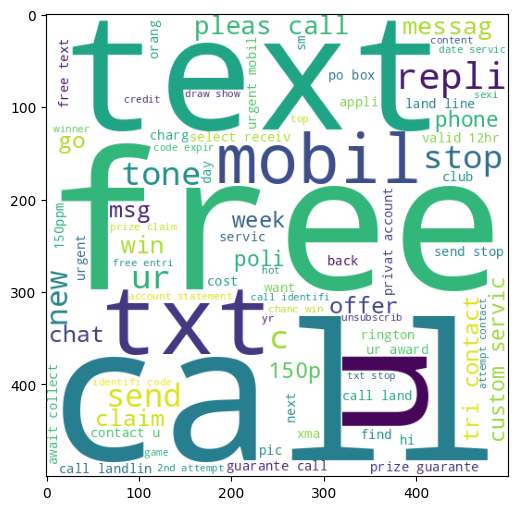

In [308]:
plt.figure(figsize=(15, 6))
plt.imshow(spam_wc)

In [309]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

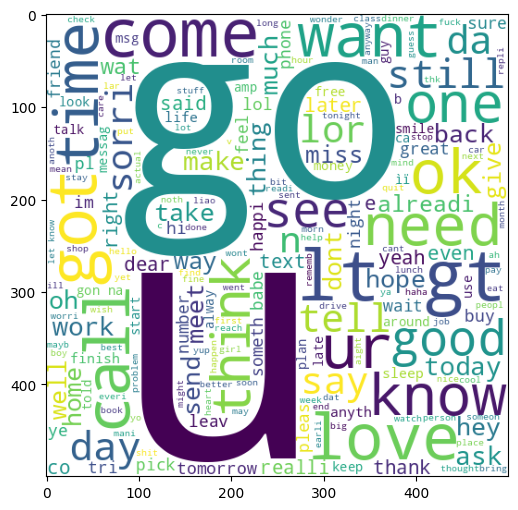

In [310]:
plt.figure(figsize=(15, 6))
plt.imshow(ham_wc)

In [311]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [312]:
from collections import Counter

In [313]:
most_common_spam_words = Counter(spam_corpus).most_common(30)
df_most_common_spam_words = pd.DataFrame(most_common_spam_words, columns=['word', 'count'])

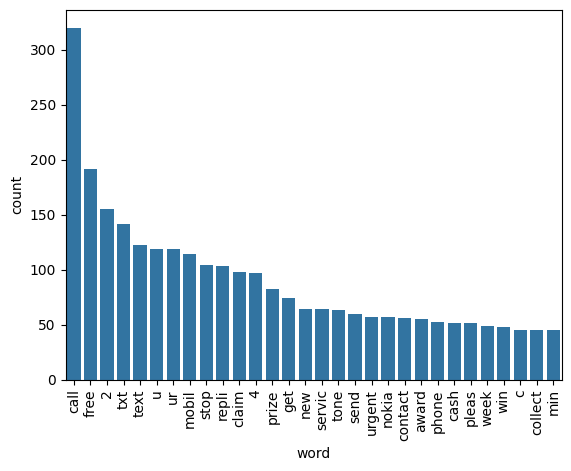

In [314]:
sns.barplot(x='word', y='count', data=df_most_common_spam_words)
plt.xticks(rotation='vertical')
plt.show()

In [315]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [316]:
most_common_ham_words = Counter(ham_corpus).most_common(30)
df_most_common_ham_words = pd.DataFrame(most_common_ham_words, columns=['word', 'count'])

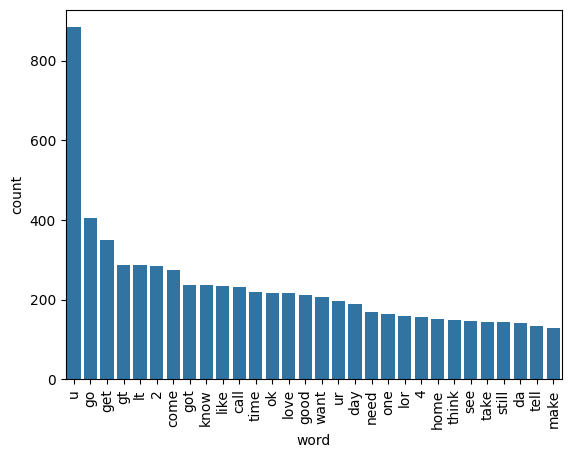

In [317]:
sns.barplot(x='word', y='count', data=df_most_common_ham_words)
plt.xticks(rotation='vertical')
plt.show()

## 4. Model Building

In [318]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)

In [319]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [320]:
X.shape

(5169, 3000)

In [321]:
y = df['target'].values

In [322]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [323]:
from sklearn.model_selection import train_test_split

In [324]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=2)

In [325]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [326]:
mnb = MultinomialNB()

In [328]:
mnb.fit(X_train, y_train)
y_pred = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(precision_score(y_test, y_pred))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [330]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))